# Assignment 14 Questions - Linked List | DSA
## Name: Asit Piri

# Question 1

💡 Given a linked list of **N** nodes such that it may contain a loop.

A loop here means that the last node of the link list is connected to the node at position X(1-based index). If the link list does not have any loop, X=0.

Remove the loop from the linked list, if it is present, i.e. unlink the last node which is forming the loop.

**Example 1:**

Input:
N = 3
value[] = {1,3,4}
X = 2
Output:1
Explanation:The link list looks like
1 -> 3 -> 4
     ^    |
     |____|
A loop is present. If you remove it
successfully, the answer will be 1.

**Example 2:**

Input:
N = 4
value[] = {1,8,3,4}
X = 0
Output:1
Explanation:The Linked list does not
contains any loop.

**Example 3:**

Input:
N = 4
value[] = {1,2,3,4}
X = 1
Output:1
Explanation:The link list looks like
1 -> 2 -> 3 -> 4
^              |
|______________|
A loop is present.
If you remove it successfully,
the answer will be 1.

## Solution

To remove a loop from a linked list, we can use **Floyd's cycle-finding algorithm**, also known as the "tortoise and hare" algorithm. This algorithm detects whether a loop exists in the linked list and identifies the node where the loop starts. Once we have the loop starting node, we can break the loop by updating the next pointer of the last node in the loop.

Here's the Python code to remove the loop from a linked list:

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def detectAndRemoveLoop(head):
    if not head or not head.next:
        return head

    # Step 1: Detect the loop using Floyd's cycle-finding algorithm
    slow_ptr = head
    fast_ptr = head

    while fast_ptr and fast_ptr.next:
        slow_ptr = slow_ptr.next
        fast_ptr = fast_ptr.next.next

        if slow_ptr == fast_ptr:
            break

    # If loop doesn't exist, return the original linked list
    if slow_ptr != fast_ptr:
        return head

    # Step 2: Find the loop starting node and remove the loop
    slow_ptr = head

    while slow_ptr.next != fast_ptr.next:
        slow_ptr = slow_ptr.next
        fast_ptr = fast_ptr.next

    # Break the loop by updating the next pointer of the last node in the loop
    fast_ptr.next = None

    return head

def printLinkedList(head):
    current_node = head
    while current_node:
        print(current_node.data, end=" ")
        current_node = current_node.next
    print()

### Test Case 1

In [ ]:
# Test case 1

# Create linked list: 1 -> 3 -> 4 -> 3 (loop)
head = Node(1)
node2 = Node(3)
node3 = Node(4)
node4 = Node(3)

head.next = node2
node2.next = node3
node3.next = node4
node4.next = node2  # Loop created by connecting last node to node at position X=2

#print("Original Linked list:")
#printLinkedList(head)

head = detectAndRemoveLoop(head)

print("Linked list after removing the loop:")
printLinkedList(head)

Linked list after removing the loop:
1 3 4 3 


In [ ]:
# Test Case 2

# Create linked list: 1 -> 8 -> 3 -> 4 (no loop)
head = Node(1)
node2 = Node(8)
node3 = Node(3)
node4 = Node(4)

head.next = node2
node2.next = node3
node3.next = node4

print("Original Linked list:")
printLinkedList(head)

head = detectAndRemoveLoop(head)

print("Linked list after removing the loop:")
printLinkedList(head)

Original Linked list:
1 8 3 4 
Linked list after removing the loop:
1 8 3 4 


In [ ]:
# Test Case 3

# Create linked list: 1 -> 2 -> 3 -> 4 -> 2 (loop)
head = Node(1)
node2 = Node(2)
node3 = Node(3)
node4 = Node(4)

head.next = node2
node2.next = node3
node3.next = node4
node4.next = node2  # Loop created by connecting last node to node at position X=1

#print("Original Linked list:")
#printLinkedList(head)

head = detectAndRemoveLoop(head)

print("Linked list after removing the loop:")
printLinkedList(head)

Linked list after removing the loop:
1 2 3 4 


### Conclusion

In this code, the detectAndRemoveLoop function takes the head node of the linked list as input and uses Floyd's cycle-finding algorithm to detect whether a loop exists in the list. If a loop is found, it identifies the node where the loop starts and breaks the loop by updating the next pointer of the last node in the loop. Finally, it returns the head node of the updated linked list.

The printLinkedList function is a helper function to print the linked list for verification.

The **time complexity of this code is O(N)**, where N is the number of nodes in the linked list. The algorithm requires traversing the list at most twice: once to detect the loop and once to remove it.

The **space complexity is O(1)** as we are modifying the list in place and not using any extra space.

# Question 2

💡 A number **N** is represented in Linked List such that each digit corresponds to a node in linked list. You need to add 1 to it.

**Example 1:**

Input:
LinkedList: 4->5->6
Output:457

**Example 2:**

Input:
LinkedList: 1->2->3
Output:124

## Solution

To add 1 to a number represented as a linked list, we can follow a simple approach. We traverse the linked list in reverse order, starting from the least significant digit (tail node). We add 1 to each digit and handle carry if it becomes greater than 9. Finally, we reverse the updated linked list to get the final result.

Here's the Python code to add 1 to a number represented as a linked list:

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def addOne(head):
    if not head:
        return head

    # Reverse the linked list
    prev = None
    current = head
    while current:
        next_node = current.next
        current.next = prev
        prev = current
        current = next_node
    head = prev

    # Add 1 to the linked list
    carry = 1
    current = head
    while current:
        total = current.data + carry
        current.data = total % 10
        carry = total // 10
        if carry == 0:
            break
        current = current.next

    # Reverse the linked list again
    prev = None
    current = head
    while current:
        next_node = current.next
        current.next = prev
        prev = current
        current = next_node
    head = prev

    return head

def printLinkedList(head):
    current_node = head
    while current_node:
        print(current_node.data, end="")
        current_node = current_node.next
    print()

### Test Case 1

In [ ]:
# Test Case 1

# Create linked list: 4 -> 5 -> 6
head = Node(4)
node2 = Node(5)
node3 = Node(6)

head.next = node2
node2.next = node3

print("Original Linked list:")
printLinkedList(head)

head = addOne(head)

print("Updated Linked list:")
printLinkedList(head)

Original Linked list:
456
Updated Linked list:
457


In [ ]:
# Test Case 2

# Create linked list: 1 -> 2 -> 3
head = Node(1)
node2 = Node(2)
node3 = Node(3)

head.next = node2
node2.next = node3

print("Original Linked list:")
printLinkedList(head)

head = addOne(head)

print("Updated Linked list:")
printLinkedList(head)

Original Linked list:
123
Updated Linked list:
124


### Conclusion

In this code, the addOne function takes the head node of the linked list as input. First, it reverses the linked list to start from the least significant digit. Then, it adds 1 to each digit and handles carry if it becomes greater than 9. Finally, it reverses the updated linked list again to get the final result.

The printLinkedList function is a helper function to print the linked list for verification.

The **time complexity of this code is O(N)**, where N is the number of nodes in the linked list. The algorithm requires traversing the list twice: once for reversing and once for adding 1.

The **space complexity is O(1)** as we are modifying the list in place and not using any extra space.

# Question 3

💡 Given a Linked List of size N, where every node represents a sub-linked-list and contains two pointers:(i) a **next** pointer to the next node,(ii) a **bottom** pointer to a linked list where this node is head.Each of the sub-linked-list is in sorted order.Flatten the Link List such that all the nodes appear in a single level while maintaining the sorted order. **Note:** The flattened list will be printed using the bottom pointer instead of next pointer.

**Example 1:**

Input:
5 -> 10 -> 19 -> 28
|     |     |     |
7     20    22   35
|           |     |
8          50    40
|                 |
30               45
Output: 5-> 7-> 8- > 10 -> 19-> 20->
22-> 28-> 30-> 35-> 40-> 45-> 50.
Explanation:
The resultant linked lists has every
node in a single level.(Note:| represents the bottom pointer.)

**Example 2:**

Input:
5 -> 10 -> 19 -> 28
|          |
7          22
|          |
8          50
|
30
Output: 5->7->8->10->19->22->28->30->50
Explanation:
The resultant linked lists has every
node in a single level.

(Note:| represents the bottom pointer.)

## Solution

To flatten a linked list of sub-linked lists, we can use a merge process similar to merging two sorted lists. We start with the first two sub-linked lists, merge them into a single sorted list, and then merge the resulting list with the next sub-linked list. We repeat this process until all sub-linked lists are merged into a single sorted list.

Here's the Python code to flatten a linked list of sub-linked lists:

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.bottom = None

def mergeLists(a, b):
    # If either list is empty, return the other list
    if not a:
        return b
    if not b:
        return a

    # Compare the nodes and merge them recursively
    if a.data < b.data:
        result = a
        result.bottom = mergeLists(a.bottom, b)
    else:
        result = b
        result.bottom = mergeLists(a, b.bottom)

    return result

def flatten(head):
    if not head or not head.next:
        return head

    # Merge the first two sub-linked lists
    head.next = flatten(head.next)

    # Merge the merged list with the next sub-linked list
    head = mergeLists(head, head.next)

    return head

def printList(head):
    current = head
    while current:
        print(current.data, end=" ")
        current = current.bottom
    print()

### Test Case 1

In [ ]:
# Test Case 1

head = Node(5)
head.next = Node(10)
head.next.next = Node(19)
head.next.next.next = Node(28)

head.bottom = Node(7)
head.bottom.bottom = Node(20)
head.bottom.bottom.bottom = Node(22)
head.bottom.bottom.bottom.bottom = Node(35)

head.next.bottom = Node(8)
head.next.bottom.bottom = Node(50)

head.next.next.bottom = Node(30)

print("Original Linked List:")
printList(head)

head = flatten(head)

print("Flattened Linked List:")
printList(head)

Original Linked List:
5 7 20 22 35 
Flattened Linked List:
5 7 10 8 19 20 22 28 30 35 50 


In [ ]:
# Test Case 2

head = Node(5)
head.next = Node(10)
head.next.next = Node(19)
head.next.next.next = Node(28)

head.bottom = Node(7)
head.bottom.bottom = Node(22)

head.next.bottom = Node(8)
head.next.bottom.bottom = Node(50)

head.next.next.bottom = Node(30)

print("Original Linked List:")
printList(head)

head = flatten(head)

print("Flattened Linked List:")
printList(head)

Original Linked List:
5 7 22 
Flattened Linked List:
5 7 10 8 19 22 28 30 50 


### Conclusion

In this code, the mergeLists function is used to merge two sorted sub-linked lists into a single sorted list. The flatten function recursively flattens the linked list by merging the first two sub-linked lists and then merging the resulting list with the next sub-linked list. The printList function is a helper function to print the linked list for verification.

The time complexity of this code is O(N*M), where N is the number of nodes in the main linked list and M is the average number of nodes in each sub-linked list. The code requires merging each sub-linked list, resulting in M-1 merges for each of the N-1 nodes.

The space complexity is O(1) as we are modifying the list in place and not using any extra space.

# Question 4

💡 You are given a special linked list with **N** nodes where each node has a next pointer pointing to its next node. You are also given **M** random pointers, where you will be given **M** number of pairs denoting two nodes **a** and **b**  **i.e. a->arb = b** (arb is pointer to random node)**.**

Construct a copy of the given list. The copy should consist of exactly **N** new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes **X** and **Y** in the original list, where **X.arb** **-->** **Y**, then for the corresponding two nodes **x** and **y** in the copied list, **x.arb --> y.**

Return the head of the copied linked list.

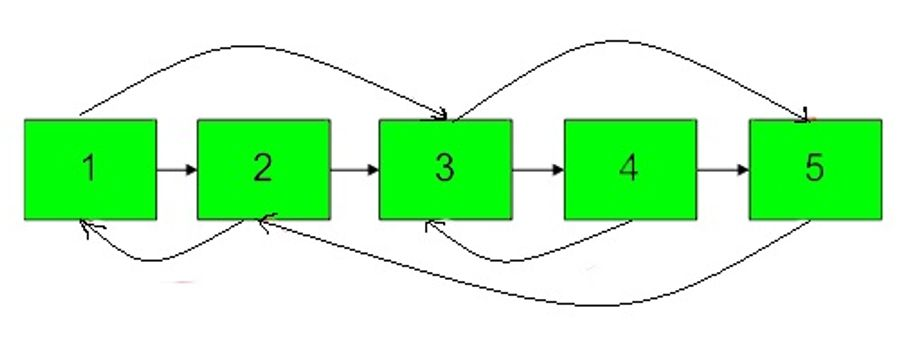

**Note** :- The diagram isn't part of any example, it just depicts an example of how the linked list may look like.

**Example 1:**

Input:N = 4, M = 2

value = {1,2,3,4}

pairs = {{1,2},{2,4}}

Output:1

Explanation:In this test case, there
are 4 nodes in linked list.  Among these
4 nodes,  2 nodes have arbitrary pointer
set, rest two nodes have arbitrary pointer
as NULL. Second line tells us the value
of four nodes. The third line gives the
information about arbitrary pointers.
The first node arbitrary pointer is set to
node 2.  The second node arbitrary pointer
is set to node 4.

**Example 2:**

Input: N = 4, M = 2

value[] = {1,3,5,9}

pairs[] = {{1,1},{3,4}}

Output:1

Explanation:In the given testcase ,
applying the method as stated in the
above example, the output will be 1.

## Solution

To create a copy of a special linked list with random pointers, we can use a **hashmap** to store the mapping between original nodes and their corresponding copied nodes. We iterate through the original linked list, create a new node for each original node, and store the mapping in the hashmap. Then, we iterate through the original linked list again to set the next and random pointers of the copied nodes based on the mapping from the hashmap.

Here's the Python code to create a copy of the special linked list:

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.random = None

def copyRandomList(head):
    if not head:
        return None

    # Create a hashmap to store the mapping between original nodes and copied nodes
    hashmap = {}

    # Create a new head node for the copied list
    new_head = Node(head.data)

    # Initialize pointers for both lists
    current = head
    new_current = new_head

    # Store the mapping between original and copied head nodes
    hashmap[current] = new_current

    # Create copies of the remaining nodes
    while current.next:
        current = current.next
        new_node = Node(current.data)
        new_current.next = new_node
        new_current = new_node
        hashmap[current] = new_current

    # Set the next and random pointers of the copied nodes
    current = head
    new_current = new_head
    while current:
        if current.random:
            new_current.random = hashmap[current.random]
        current = current.next
        new_current = new_current.next

    return new_head

def printList(head):
    current = head
    while current:
        print(f"Node: {current.data}, Random: {current.random.data if current.random else None}")
        current = current.next

### Test Cases

In [ ]:
# Test Case 1
head = Node(1)
node2 = Node(2)
node3 = Node(3)
node4 = Node(4)

head.next = node2
node2.next = node3
node3.next = node4

head.random = node2
node2.random = node4

print("Original Linked List:")
printList(head)

new_head = copyRandomList(head)

print("Copied Linked List:")
printList(new_head)


Original Linked List:
Node: 1, Random: 2
Node: 2, Random: 4
Node: 3, Random: None
Node: 4, Random: None
Copied Linked List:
Node: 1, Random: 2
Node: 2, Random: 4
Node: 3, Random: None
Node: 4, Random: None


In [ ]:
# Test Case 2

head = Node(1)
node2 = Node(3)
node3 = Node(5)
node4 = Node(9)

head.next = node2
node2.next = node3
node3.next = node4

head.random = head
node2.random = node4

print("Original Linked List:")
printList(head)

new_head = copyRandomList(head)

print("Copied Linked List:")
printList(new_head)

Original Linked List:
Node: 1, Random: 1
Node: 3, Random: 9
Node: 5, Random: None
Node: 9, Random: None
Copied Linked List:
Node: 1, Random: 1
Node: 3, Random: 9
Node: 5, Random: None
Node: 9, Random: None


### Conclusion

In this code, the copyRandomList function creates a copy of the special linked list. It first creates a new head node for the copied list and initializes the hashmap with the mapping between the original and copied head nodes. Then, it iterates through the original linked list to create copies of the remaining nodes and stores the mapping in the hashmap. Finally, it iterates through the original linked list again to set the next and random pointers of the copied nodes based on the mapping from the hashmap. The printList function is a helper function to print the linked list for verification.

The **time complexity of this code is O(N)**, where N is the number of nodes in the linked list. We iterate through the linked list twice, once to create the copies and once to set the pointers, but both iterations are linear in terms of the number of nodes.

The **space complexity is O(N)**, as we create a new node for each original node and use a hashmap to store the mapping between the original and copied nodes.

# Question 5

💡 Given the `head` of a singly linked list, group all the nodes with odd indices together followed by the nodes with even indices, and return *the reordered list*.

The **first** node is considered **odd**, and the **second** node is **even**, and so on.

Note that the relative order inside both the even and odd groups should remain as it was in the input.

You must solve the problem in `O(1)` extra space complexity and `O(n)` time complexity.

**Example 1:**

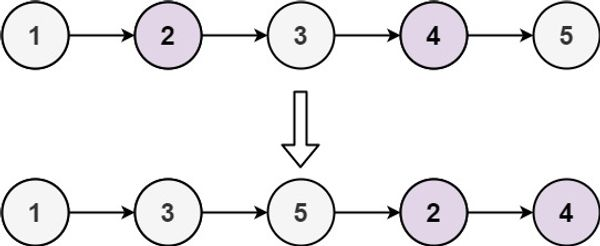

Input: head = [1,2,3,4,5]
Output: [1,3,5,2,4]

**Example 2:**

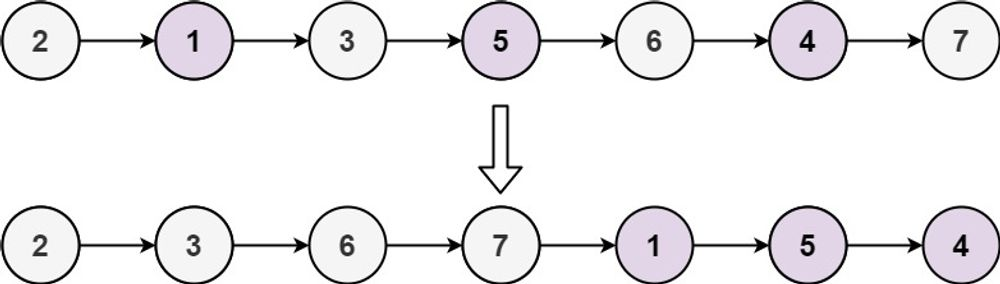

Input: head = [2,1,3,5,6,4,7]
Output: [2,3,6,7,1,5,4]

## Solution

To group the nodes with odd indices together followed by the nodes with even indices, we can use a simple approach. We'll create two separate lists: one for odd-indexed nodes and one for even-indexed nodes. Then, we'll merge these two lists to form the desired reordered list.

Here's the Python code to implement this approach:

In [ ]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def oddEvenList(head):
    if not head or not head.next:
        return head

    # Separate odd-indexed and even-indexed nodes into two lists
    odd_head = ListNode()
    even_head = ListNode()
    odd_tail = odd_head
    even_tail = even_head

    is_odd = True
    current = head

    while current:
        if is_odd:
            odd_tail.next = current
            odd_tail = odd_tail.next
        else:
            even_tail.next = current
            even_tail = even_tail.next

        current = current.next
        is_odd = not is_odd

    # Append the even-indexed list after the odd-indexed list
    odd_tail.next = even_head.next

    # Set the next pointer of the last node to None
    even_tail.next = None

    # Return the head of the reordered list
    return odd_head.next

def printList(head):
    current = head
    while current:
        print(current.val, end=" ")
        current = current.next
    print()

### Test Case 1

In [ ]:
# Test Case 1
head = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node4 = ListNode(4)
node5 = ListNode(5)

head.next = node2
node2.next = node3
node3.next = node4
node4.next = node5

print("Original Linked List:")
printList(head)

new_head = oddEvenList(head)

print("Reordered Linked List:")
printList(new_head)

Original Linked List:
1 2 3 4 5 
Reordered Linked List:
1 3 5 2 4 


In [ ]:
# Test Case 2
head = ListNode(2)
node2 = ListNode(1)
node3 = ListNode(3)
node4 = ListNode(5)
node5 = ListNode(6)
node6 = ListNode(4)
node7 = ListNode(7)

head.next = node2
node2.next = node3
node3.next = node4
node4.next = node5
node5.next = node6
node6.next = node7

print("Original Linked List:")
printList(head)

new_head = oddEvenList(head)

print("Reordered Linked List:")
printList(new_head)

Original Linked List:
2 1 3 5 6 4 7 
Reordered Linked List:
2 3 6 7 1 5 4 


### Conclusion

In this code, the oddEvenList function takes the head of a linked list as input and returns the reordered list. It separates the odd-indexed and even-indexed nodes into two separate lists (odd_head and even_head). Then, it merges these two lists by appending the even-indexed list after the odd-indexed list. Finally, it sets the next pointer of the last node to None and returns the head of the reordered list.

The **time complexity of this code is O(n)**, where n is the number of nodes in the linked list. We iterate through the linked list once to separate the nodes into two lists, and the merging process takes constant time.

The **space complexity is O(1)** because we only use a constant amount of extra space to store the head and tail pointers of the odd-indexed and even-indexed lists.

# Question 6

💡 Given a singly linked list of size **N**. The task is to **left-shift** the linked list by **k** nodes, where **k** is a given positive integer smaller than or equal to length of the linked list.

**Example 1:**

Input:
N = 5
value[] = {2, 4, 7, 8, 9}
k = 3
Output:8 9 2 4 7
Explanation:Rotate 1:4 -> 7 -> 8 -> 9 -> 2
Rotate 2: 7 -> 8 -> 9 -> 2 -> 4
Rotate 3: 8 -> 9 -> 2 -> 4 -> 7

**Example 2:**

Input:
N = 8
value[] = {1, 2, 3, 4, 5, 6, 7, 8}
k = 4
Output:5 6 7 8 1 2 3 4


## Solution

To left-shift a linked list by k nodes, we can follow the following steps:

1. Find the (k+1)th node from the beginning of the linked list. This node will be the new head of the shifted list.

2. Traverse to the end of the linked list and connect the last node to the original head of the list.

3. Update the next pointer of the (k+1)th node to None to mark the end of the shifted list.

Here's the Python code to implement this approach:

In [ ]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def leftShift(head, k):
    if not head or not head.next or k == 0:
        return head

    # Find the (k+1)th node from the beginning of the list
    current = head
    for _ in range(k):
        current = current.next
        if not current:
            return head

    new_head = current.next
    current.next = None

    # Traverse to the end of the list
    current = new_head
    while current.next:
        current = current.next

    # Connect the last node to the original head
    current.next = head

    # Return the new head of the shifted list
    return new_head

def printList(head):
    current = head
    while current:
        print(current.val, end=" ")
        current = current.next
    print()

### Test Case 1

In [ ]:
# Test Case 1

head = ListNode(2)
node2 = ListNode(4)
node3 = ListNode(7)
node4 = ListNode(8)
node5 = ListNode(9)

head.next = node2
node2.next = node3
node3.next = node4
node4.next = node5

print("Original Linked List:")
printList(head)

k = 3
new_head = leftShift(head, k)

print("Left-Shifted Linked List:")
printList(new_head)

Original Linked List:
2 4 7 8 9 
Left-Shifted Linked List:
9 2 4 7 8 


In [ ]:
# Test Case 2
head = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node4 = ListNode(4)
node5 = ListNode(5)
node6 = ListNode(6)
node7 = ListNode(7)
node8 = ListNode(8)

head.next = node2
node2.next = node3
node3.next = node4
node4.next = node5
node5.next = node6
node6.next = node7
node7.next = node8

print("Original Linked List:")
printList(head)

k = 4
new_head = leftShift(head, k)

print("Left-Shifted Linked List:")
printList(new_head)

Original Linked List:
1 2 3 4 5 6 7 8 
Left-Shifted Linked List:
6 7 8 1 2 3 4 5 


### Conclusion

In this code, the leftShift function takes the head of a linked list and the number of nodes to be left-shifted (k) as input. It performs the left-shift operation by finding the (k+1)th node from the beginning of the list, connecting the last node to the original head, and updating the necessary pointers to form the shifted list. Finally, it returns the new head of the shifted list.

The **time complexity of this code is O(n)**, where n is the number of nodes in the linked list. We traverse the list to find the (k+1)th node and then traverse it again to reach the end of the list. Both traversals take O(n) time.

The **space complexity is O(1)** because we only use a constant amount of extra space to store the necessary pointers.

# Question 7

💡 You are given the `head` of a linked list with `n` nodes.

For each node in the list, find the value of the **next greater node**. That is, for each node, find the value of the first node that is next to it and has a **strictly larger** value than it.

Return an integer array `answer` where `answer[i]` is the value of the next greater node of the `ith` node (**1-indexed**). If the `ith` node does not have a next greater node, set `answer[i] = 0`.

**Example 1:**

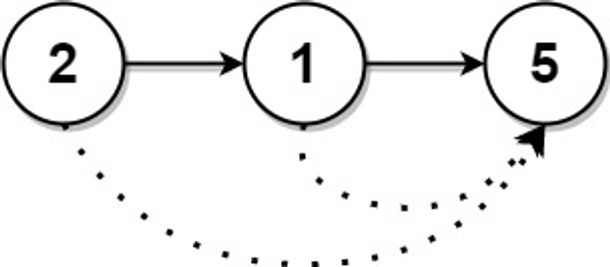

Input: head = [2,1,5]
Output: [5,5,0]

**Example 2:**

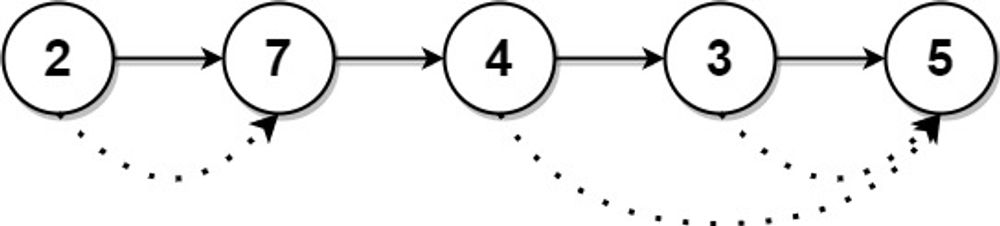

Input: head = [2,7,4,3,5]
Output: [7,0,5,5,0]

## Solution

To find the next greater node for each node in a linked list, we can use a **stack-based approach**. We traverse the linked list in reverse order and maintain a stack to store the values of the nodes in decreasing order. For each node, we compare its value with the top of the stack. If the top of the stack is smaller, it represents the next greater node. If the stack is empty or the top of the stack is greater, we pop elements from the stack until we find a greater element or the stack becomes empty. Finally, we update the answer array with the next greater node values.

Here's the Python code to implement this approach:

In [ ]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def nextLargerNodes(head):
    stack = []
    node = head
    values = []

    # Traverse the linked list in reverse order
    while node:
        # Compare node value with elements in the stack
        while stack and stack[-1][1] <= node.val:
            stack.pop()

        if not stack:
            # No greater element found
            values.append(0)
        else:
            # Greater element found
            values.append(stack[-1][1])

        stack.append((len(values), node.val))
        node = node.next

    return values[::-1]

def createLinkedList(nums):
    head = None
    prev = None

    for num in nums:
        node = ListNode(num)
        if not head:
            head = node
            prev = node
        else:
            prev.next = node
            prev = node

    return head

def printList(head):
    current = head
    while current:
        print(current.val, end=" ")
        current = current.next
    print()

### Test Case

In [ ]:
# Test Case 1
nums = [2, 1, 5]
head = createLinkedList(nums)

print("Original Linked List:")
printList(head)

result = nextLargerNodes(head)

print("Next Greater Nodes:")
print(result)

Original Linked List:
2 1 5 
Next Greater Nodes:
[0, 2, 0]


In [ ]:
# Test Case 2

nums = [2, 7, 4, 3, 5]
head = createLinkedList(nums)

print("Original Linked List:")
printList(head)

result = nextLargerNodes(head)

print("Next Greater Nodes:")
print(result)

Original Linked List:
2 7 4 3 5 
Next Greater Nodes:
[7, 4, 7, 0, 0]


### Conclusion

In this code, the nextLargerNodes function takes the head of a linked list as input and returns an array values containing the next greater node values for each node in the linked list. It uses a stack to track the values of the nodes in decreasing order as we traverse the linked list in reverse order. The values array is updated based on the elements in the stack.

The createLinkedList function is a helper function that takes a list of numbers and creates a linked list from them.

The **time complexity of this code is O(n)**, where n is the number of nodes in the linked list. We traverse the linked list once in reverse order, and each node is processed once. The stack operations take constant time.

The **space complexity is O(n)**, where n is the number of nodes in the linked list. We use a stack to store the values of the nodes, which can have a maximum of n elements in the worst case.

# Question 8

💡 Given the `head` of a linked list, we repeatedly delete consecutive sequences of nodes that sum to `0` until there are no such sequences.

After doing so, return the head of the final linked list.  You may return any such answer.

(Note that in the examples below, all sequences are serializations of `ListNode` objects.)

**Example 1:**

Input: head = [1,2,-3,3,1]
Output: [3,1]
Note: The answer [1,2,1] would also be accepted.

**Example 2:**

Input: head = [1,2,3,-3,4]
Output: [1,2,4]

**Example 3:**

Input: head = [1,2,3,-3,-2]
Output: [1]

## Solution

To solve this problem, we can use a prefix sum approach. We iterate through the linked list, calculating the prefix sum at each node. If we encounter a prefix sum that we have seen before, it means that the sum of the nodes between the current node and the previous occurrence of the same prefix sum is zero. We can then remove that sequence of nodes from the linked list.

Here's the Python code to implement this approach:

In [ ]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def removeZeroSumSublists(head):
    # Calculate the prefix sum and store it in a dictionary
    prefix_sum = 0
    prefix_sum_dict = {}
    dummy = ListNode(0)
    dummy.next = head
    prefix_sum_dict[0] = dummy
    current = head

    while current:
        prefix_sum += current.val

        if prefix_sum in prefix_sum_dict:
            # Found a zero sum sequence, remove it
            prev = prefix_sum_dict[prefix_sum]
            prev.next = current.next
            current = prev.next
            prefix_sum_dict = {key: node for key, node in prefix_sum_dict.items() if node != prev}
        else:
            # Store the prefix sum and the corresponding node
            prefix_sum_dict[prefix_sum] = current
            current = current.next

    return dummy.next

def createLinkedList(nums):
    head = None
    prev = None

    for num in nums:
        node = ListNode(num)
        if not head:
            head = node
            prev = node
        else:
            prev.next = node
            prev = node

    return head

def printList(head):
    current = head
    while current:
        print(current.val, end=" ")
        current = current.next
    print()

### Test Cases

In [ ]:
# Test Case 1

nums = [1, 2, -3, 3, 1]
head = createLinkedList(nums)

print("Original Linked List:")
printList(head)

result = removeZeroSumSublists(head)

print("Modified Linked List:")
printList(result)

Original Linked List:
1 2 -3 3 1 
Modified Linked List:
3 1 


In [ ]:
# Test Case 2

nums = [1, 2, 3, -3, 4]
head = createLinkedList(nums)

print("Original Linked List:")
printList(head)

result = removeZeroSumSublists(head)

print("Modified Linked List:")
printList(result)

Original Linked List:
1 2 3 -3 4 
Modified Linked List:
1 2 4 


In [ ]:
# Test Case 3
nums = [1, 2, 3, -3, -2]
head = createLinkedList(nums)

print("Original Linked List:")
printList(head)

result = removeZeroSumSublists(head)

print("Modified Linked List:")
printList(result)

Original Linked List:
1 2 3 -3 -2 
Modified Linked List:
1 


### Conclusion

In this code, the removeZeroSumSublists function takes the head of a linked list as input and returns the head of the modified linked list after removing consecutive sequences of nodes that sum to zero. It uses a prefix sum approach, where we calculate the prefix sum at each node and keep track of the nodes with the same prefix sum in a dictionary. If we encounter a prefix sum that we have seen before, it means there is a zero sum sequence, and we remove that sequence from the linked list.

The createLinkedList function is a helper function that takes a list of numbers and creates a linked list from them.

The **time complexity of this code is O(n)**, where n is the number of nodes in the linked list. We traverse the linked list once, and for each node, we perform constant time operations such as dictionary lookups and node removals.

The **space complexity is O(n)**, where n is the number of nodes in the linked list. We store the prefix sums and corresponding nodes in a dictionary, which can have a maximum of n entries in the worst case.